<a href="https://colab.research.google.com/github/Sheetal25-pixel/end-to-end/blob/main/Cartooning_an_Image_using_OpenCV_%E2%80%93_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

Saving download.jpg to download (2).jpg


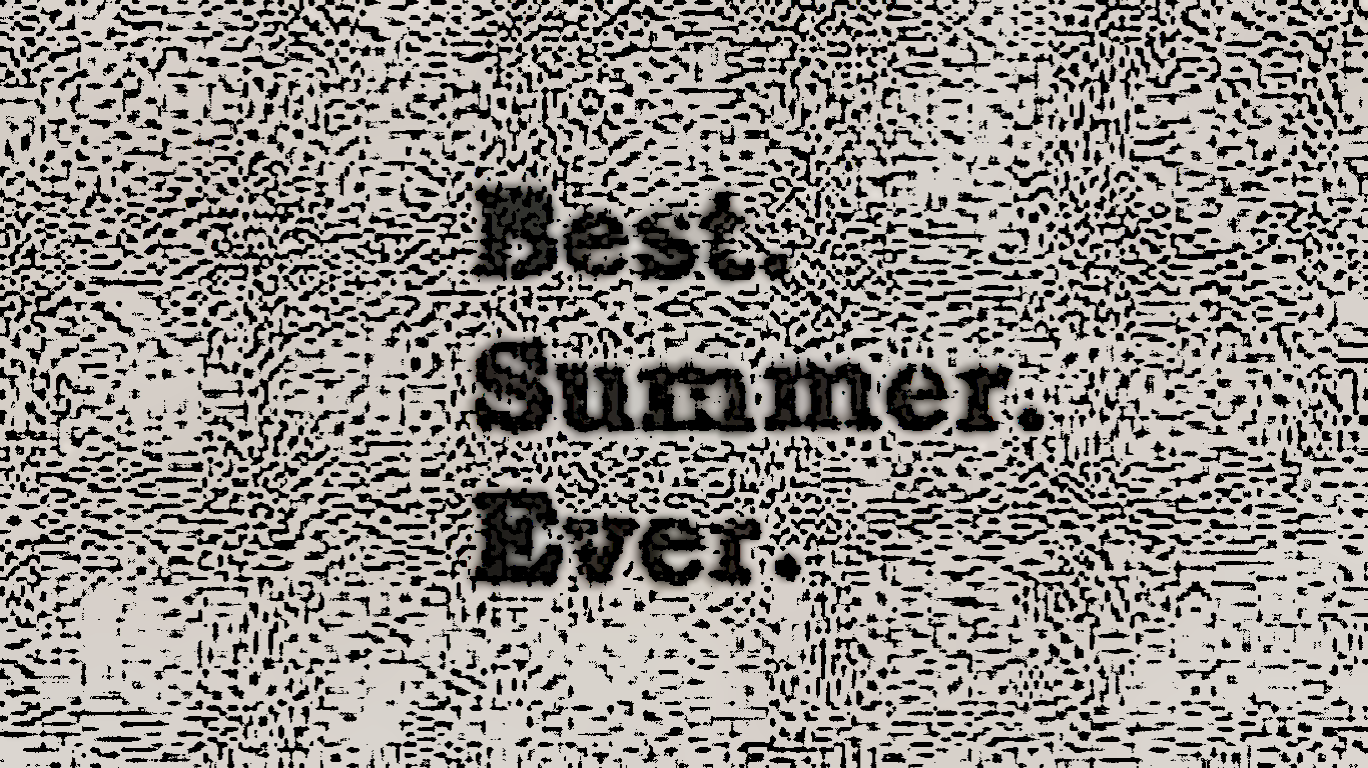

In [13]:
# Import necessary libraries
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow

# Cartoonizer Class Definition
class Cartoonizer:
    """Cartoonizer effect
    A class that applies a cartoon effect to an image.
    The class uses a bilateral filter and adaptive thresholding to create
    a cartoon effect.
    """
    def __init__(self):
        pass

    def render(self, img_rgb):
        # Check if the image was loaded correctly
        if img_rgb is None:
            print(f"Error: Could not load image. Please check the file path and format.")
            return None  # or raise an exception

        # Resize image (optional step, you can adjust or remove this based on your needs)
        img_rgb = cv2.resize(img_rgb, (1366, 768))

        numDownSamples = 2  # Number of downscaling steps
        numBilateralFilters = 50  # Number of bilateral filtering steps

        # -- STEP 1 --
        # Downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)

        # Apply small bilateral filter instead of one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

        # Upsample image back to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)

        # -- STEPS 2 and 3 --
        # Convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)

        # -- STEP 4 --
        # Detect and enhance edges
        img_edge = cv2.adaptiveThreshold(img_blur, 255,
                cv2.ADAPTIVE_THRESH_MEAN_C,
                cv2.THRESH_BINARY, 9, 2)

        # -- STEP 5 --
        # Convert edge image back to color for bitwise AND operation
        (x, y, z) = img_color.shape
        img_edge = cv2.resize(img_edge, (y, x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

        # Combine the color and edge images
        return cv2.bitwise_and(img_color, img_edge)

# Upload image using Google Colab file upload tool
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Read the image using OpenCV
img_rgb = cv2.imread(file_name)

# Instantiate the Cartoonizer class
tmp_canvas = Cartoonizer()

# Generate the cartoon effect
res = tmp_canvas.render(img_rgb)

# Check if the cartoon effect was applied successfully
if res is not None:
    # Save the resulting cartoonized image
    cv2.imwrite("Cartoon_version.jpg", res)

    # Display the resulting cartoonized image
    cv2_imshow(res)
else:
    print("Failed to generate the cartoon effect.")
